# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908450000000,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_rides= pyber_data_df.groupby("type").count()["ride_id"]

In [4]:
# 2. Get the total drivers for each city type
total_drivers= city_data_df.groupby("type").sum()["driver_count"]

In [5]:
#  3. Get the total amount of fares for each city type
total_fares= pyber_data_df.groupby("type").sum()["fare"]

In [6]:
#  4. Get the average fare per ride for each city type. 
average_fare_city= total_fares/ total_rides

In [7]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver= total_fares/ total_drivers

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df= pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": average_fare_city,
    "Average Fare per Driver": average_fare_driver})

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"]= pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"]= pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"]= pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"]= pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"]= pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df["date"]= pd.to_datetime(pyber_data_df["date"])

In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
date_type= pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
date_type = date_type.reset_index()

In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_type_pivot= date_type.pivot( index= "date", columns= "type", values= "fare")
date_type_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_type_pivot= date_type_pivot.loc["2019-01-01":"2019-04-28"]

In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
date_type_pivot.index = pd.to_datetime(date_type_pivot.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
date_type_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-28 19:35:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_type_week= date_type_pivot.resample("W").sum()
date_type_week.index.name= None
date_type_week

type,Rural,Suburban,Urban
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20
2019-03-10,303.94,925.27,2470.93


[]

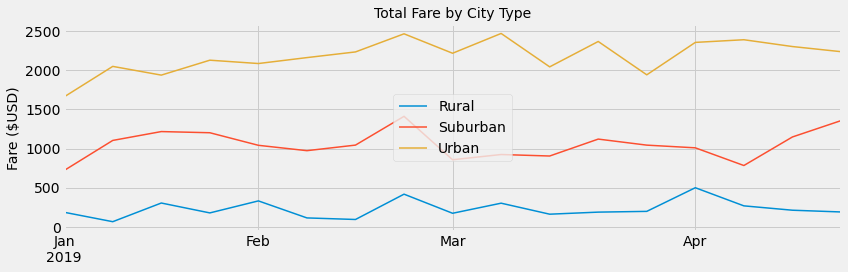

In [36]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
#fig= plt.figure()
ax= date_type_week.plot(figsize=(12,4), linewidth=1.5)
ax.set_ylabel("Fare ($USD)", fontsize= 14)
ax.set_title("Total Fare by City Type", fontsize= 14)
ax.legend(date_type_week.columns, loc="center")
plt.tight_layout()
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
#Save plot
plt.savefig("Analysis/PyBer_fare_summary.png")
ax.plot()